In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

In [ ]:
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_file_path = "/content/drive/MyDrive/merged2023.csv"
df = pd.read_csv(csv_file_path, encoding="utf-8-sig")

In [ ]:
df

,BRDCST_DE,CHNNEL_NM,ADVRTS_MATR_NM,ADVRTS_BEGIN_TIME,ADVRTS_TIME,ADVRTS_TY_NM,UNIT_ACCTO_ADVRTS_ODR,UNIT_ACCTO_ADVRTS_CO,INDUTY_SCLAS_NM,ADVRTS_TY_DC,AREA_NM,ANALS_TRGET_NM,TVGRP_CO,frequency
0,20230101,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,프로 A(정상요금),3,3,패스트푸드점,[슈퍼맨이돌아왔다(재)] {광고 / 후},서울,가구,1,0
1,20230101,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,프로 A(정상요금),3,3,패스트푸드점,[슈퍼맨이돌아왔다(재)] {광고 / 후},서울,개인,0,0
2,20230101,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,프로 A(정상요금),3,3,패스트푸드점,[슈퍼맨이돌아왔다(재)] {광고 / 후},경기·인천,가구,1,0
3,20230101,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,프로 A(정상요금),3,3,패스트푸드점,[슈퍼맨이돌아왔다(재)] {광고 / 후},경기·인천,개인,0,0
4,20230101,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,프로 A(정상요금),3,3,패스트푸드점,[슈퍼맨이돌아왔다(재)] {광고 / 후},경기·인천,유료매체가입가구,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133607,20231226,SBS,진천청주왕족발보쌈 (백년가게의맛/건강하고맛있게),73313,20,토막 B(정상요금),2,3,대중음식점,[광고 / 07시39분],충청북도,유료매체가입개인,3,1
1133608,20231226,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,토막 B(정상요금),1,5,패스트푸드점,[광고 / 07시39분],제주도,가구,0,1
1133609,20231226,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,토막 B(정상요금),1,5,패스트푸드점,[광고 / 07시39분],제주도,개인,0,1
1133610,20231226,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,토막 B(정상요금),1,5,패스트푸드점,[광고 / 07시39분],제주도,유료매체가입가구,0,1


#1. 방송일자 문자열 --> 날짜형으로 변경

In [ ]:
# BRDCST_DE를 문자열로 변환한 후 날짜로 변환
df['BRDCST_DE'] = pd.to_datetime(df['BRDCST_DE'].astype(str), format='%Y%m%d', errors='coerce')

In [ ]:
# 1: 월(`YYYY-MM`) 정보 추출
df['month'] = pd.to_datetime(df['BRDCST_DE']).dt.to_period('M')  # 'YYYY-MM' 형식 추출

In [ ]:
# 2: 월별 GRP 평균 계산
monthly_grp = df.groupby('month')['TVGRP_CO'].mean().reset_index()

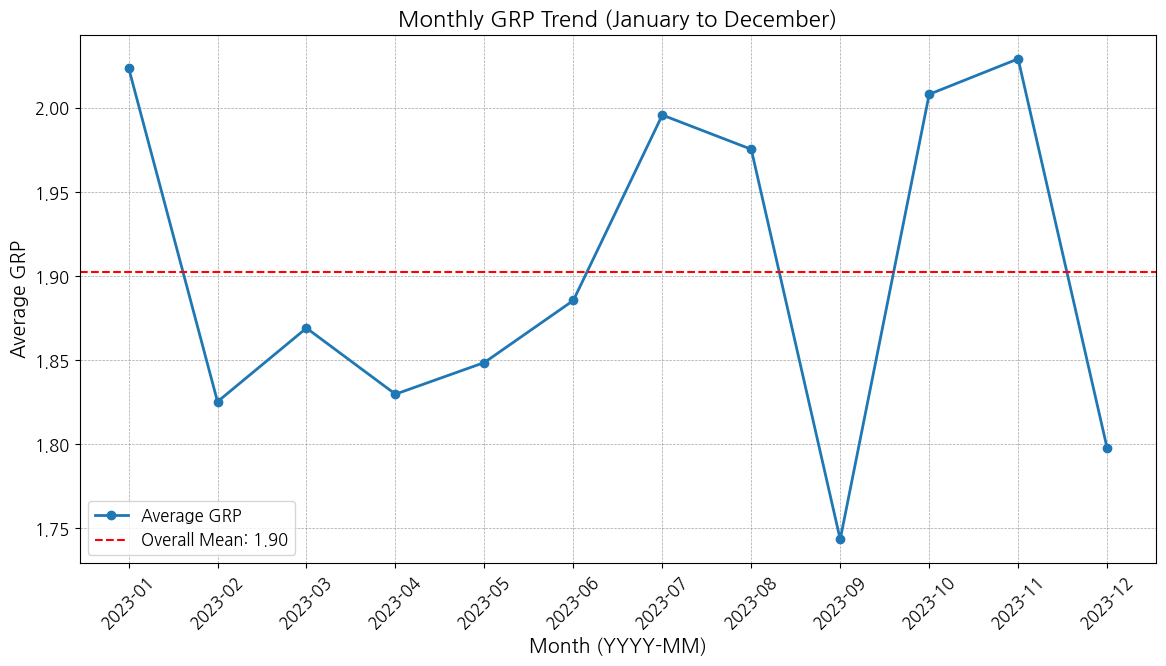

In [ ]:
# 3: 그래프로 트렌드 시각화
plt.figure(figsize=(12, 7))
plt.plot(
    monthly_grp['month'].astype(str),
    monthly_grp['TVGRP_CO'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='#1f77b4',
    label="Average GRP"
)

plt.title("Monthly GRP Trend (January to December)", fontsize=16, fontweight='bold')
plt.xlabel("Month (YYYY-MM)", fontsize=14)
plt.ylabel("Average GRP", fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

mean_grp = monthly_grp['TVGRP_CO'].mean()
plt.axhline(mean_grp, color='red', linestyle='--', linewidth=1.5, label=f"Overall Mean: {mean_grp:.2f}")

plt.legend(fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
df['요일'] = df['BRDCST_DE'].dt.day_name().replace({'Monday': 'Weekday', 'Tuesday': 'Weekday',
                                               'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday'})

In [ ]:
#월별 칼럼 필요없으니 drop.
df = df.drop(columns=["month"])

# 광고유형명(TV_NM) 전처리

### 1. 시간(hour)추출

In [ ]:
# 광고 시작 시간을 HH:MM:SS 형식으로 변환
#df['ADVRTS_BEGIN_TIME'] = df['ADVRTS_BEGIN_TIME'].astype(str).str.zfill(6)  # 6자리 숫자로 변환
#df['ADVRTS_BEGIN_TIME'] = pd.to_datetime(df['ADVRTS_BEGIN_TIME'], format='%H%M%S', errors='coerce').dt.time

In [ ]:
# 'ADVRTS_BEGIN_TIME'을 문자열(6자리)로 변환
#df['ADVRTS_BEGIN_TIME'] = df['ADVRTS_BEGIN_TIME'].astype(str).str.zfill(6)

#def convert_time_format(time_str):
    #"""24시 이상인 시간을 00~23시 형식으로 변환"""
    #if len(time_str) == 6:
        #hour = int(time_str[:2])  # 앞 2자리: 시(hour)
        #minute = time_str[2:4]  # 중간 2자리: MM
        #second = time_str[4:6]  # 마지막 2자리: SS
        #if hour >= 24:  # 24시 이상이면 24를 빼서 변환
            #hour -= 24
        #return f"{hour:02d}:{minute}:{second}"  # 변환된 HH:MM:SS 값 반환
    #return time_str  # 변환 불가능한 경우 원래 값을 그대로 반환

# 변환 적용
#df['CORRECTED_BEGIN_TIME'] = df['ADVRTS_BEGIN_TIME'].apply(convert_time_format)

# HH:MM:SS 형식으로 변환하여 적용
#df['ADVRTS_BEGIN_TIME'] = pd.to_datetime(df['CORRECTED_BEGIN_TIME'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
# 광고 시작 시간에서 시간(hour)만 추출
#df['ADVRTS_HOUR'] = pd.to_datetime(df['ADVRTS_BEGIN_TIME'], format='%H:%M:%S', errors='coerce').dt.hour

In [ ]:
# 변환 후 결측치 개수 확인
#missing_values = df[['ADVRTS_BEGIN_TIME', 'ADVRTS_HOUR']].isnull().sum()

# 결측치 개수 출력
#print("결측치 개수 확인:")
#print(missing_values)

# 2. TYPE / CLASS 열 생성 후 TY_NM DROP

In [ ]:
# 광고 유형명 전처리 (불필요한 공백 제거)
df["ADVRTS_TY_NM"] = df["ADVRTS_TY_NM"].str.strip()

In [ ]:
import numpy as np
import pandas as pd

# 조건에 따른 광고 종류 문자열 생성
conditions = [
    df["ADVRTS_TY_NM"].str.contains("ID|곧이어", regex=True),  # 자막 광고
    df["ADVRTS_TY_NM"].str.contains("토막", regex=True),         # 토막 광고
    df["ADVRTS_TY_NM"].str.contains("프로", regex=True),          # 프로 광고
]
choices = ["자막", "토막", "프로"]

df["TYPE_STR"] = np.select(conditions, choices, default="오류")

# One-Hot Encoding 적용 (오류 값은 별도로 처리하거나 제외할 수 있음)
df = pd.get_dummies(df, columns=["TYPE_STR"], prefix="TYPE")

In [ ]:
# SALE 열 생성: '할인'이면 1, 아니면 0
#df["SALE"] = np.where(df["ADVRTS_TY_NM"].str.contains("할인"), 1, 0)

# 원-핫 인코딩 적용: SALE 열을 기준으로 새로운 더미 변수 생성
#df = pd.get_dummies(df, columns=["SALE"], prefix="SALE")

In [ ]:
import pandas as pd

# CLASS 열 생성: ADVRTS_TY_NM 열에서 A, B, C, SA 추출
df["CLASS"] = df["ADVRTS_TY_NM"].str.extract(r"(A|B|C|SA)")

# 원-핫 인코딩 적용: CLASS 열을 기준으로 새로운 더미 변수 생성
df = pd.get_dummies(df, columns=["CLASS"], prefix="CLASS")

In [ ]:
# 기존 광고 유형명 열 삭제
df.drop(columns=["ADVRTS_TY_NM"], inplace=True)

# 3. TY_DC (광고유형설명; 위치)

In [ ]:
df['ADVRTS_TY_DC'].unique()

array(['[슈퍼맨이돌아왔다(재)] {광고 / 후}', '[KBS연기대상(재)] {광고 / 전}',
       '[KBS연기대상(재)] {광고 / 후}', ...,
       '[SBS연예대상(재) / <2부>] {SBS연예대상(재) / <2부>}',
       '[MBC100분토론 / <2023년올해의사건과인물>] {광고 / 전}', '[출력제한전력시장의비밀] {광고 / 후}'],
      dtype=object)

In [ ]:
import re
import pandas as pd

# 분류 함수 정의
def classify_order(text):
    """
    ADVRTS_TY_DC 형식의 문자열을 받아 광고 순서를 반환한다.

    규칙:
      - 문자열에 중괄호 { } 가 있으면:
          - 중괄호 내부에 '전' 이 있으면 '전'
          - 중괄호 내부에 '후' 가 있으면 '후'
          - 그 외(예: [SBS연예대상(재) / <2부>] {SBS연예대상(재) / <2부>})이면 '중간'
      - 중괄호가 없으면 단일 대괄호만 있는 경우이므로 '프로'
    """
    # 중괄호 내의 텍스트 추출
    match = re.search(r'\{(.*?)\}', text)
    if match:
        inner_text = match.group(1)
        if '전' in inner_text:
            return '전'
        elif '후' in inner_text:
            return '후'
        else:
            return '중간'
    else:
        return '그외'  #자막/토막 유형


# 새로운 컬럼에 분류 결과 적용
df['AD_POSITION'] = df['ADVRTS_TY_DC'].apply(classify_order)

# 결과 출력
print(df)

         BRDCST_DE CHNNEL_NM                 ADVRTS_MATR_NM  \
0       2023-01-01      KBS2      맥도날드 (애니메이션/RMHC하우스/행운버거)   
1       2023-01-01      KBS2      맥도날드 (애니메이션/RMHC하우스/행운버거)   
2       2023-01-01      KBS2      맥도날드 (애니메이션/RMHC하우스/행운버거)   
3       2023-01-01      KBS2      맥도날드 (애니메이션/RMHC하우스/행운버거)   
4       2023-01-01      KBS2      맥도날드 (애니메이션/RMHC하우스/행운버거)   
...            ...       ...                            ...   
1133607 2023-12-26       SBS     진천청주왕족발보쌈 (백년가게의맛/건강하고맛있게)   
1133608 2023-12-26       SBS  맥도날드 (NCT도영/행운버거를구매해주신/감사합니다)   
1133609 2023-12-26       SBS  맥도날드 (NCT도영/행운버거를구매해주신/감사합니다)   
1133610 2023-12-26       SBS  맥도날드 (NCT도영/행운버거를구매해주신/감사합니다)   
1133611 2023-12-26       SBS  맥도날드 (NCT도영/행운버거를구매해주신/감사합니다)   

         ADVRTS_BEGIN_TIME  ADVRTS_TIME  UNIT_ACCTO_ADVRTS_ODR  \
0                   125138           30                      3   
1                   125138           30                      3   
2                   125138           30      

In [ ]:
grp_means = df.groupby("AD_POSITION")["TVGRP_CO"].mean()
print(grp_means)

AD_POSITION
그외    1.558633
전     1.293091
중간    3.306892
후     1.908270
Name: TVGRP_CO, dtype: float64


중간 > 후 > 프로 > 전

In [ ]:
df = pd.get_dummies(df, columns=["AD_POSITION"], prefix="AD_POS")

In [ ]:
#기존 광고유형설명(TY_DC) 열 삭제
df.drop(columns=["ADVRTS_TY_DC"], inplace=True)

## NLP스러운거..

In [ ]:
#!pip install konlpy

## TF-IDF 분석: 가장 많이 등장하는 단어를 확인

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# NaN 값 제거 후 리스트 변환
advert_texts = df["ADVRTS_MATR_NM"].dropna().tolist()

# CountVectorizer: 단어 등장 빈도 분석
vectorizer = CountVectorizer(max_features=20, stop_words="english")  # 상위 20개 단어만 분석
X = vectorizer.fit_transform(advert_texts)

# 단어별 등장 횟수 출력
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
print("📊 광고 문구에서 가장 많이 등장한 단어:", word_freq)


📊 광고 문구에서 가장 많이 등장한 단어: {'60계치킨': 126437, 'id자막': 35337, '가상': 76469, '고기맛은두께다': 50406, '곧이어자막': 67351, '그냥좋은거야': 39447, '뉴진스': 39318, '마동석': 39447, '맥도날드': 255070, '브릿지': 41972, '신나는데이유가어딨어': 39447, '아웃백스테이크하우스': 97330, '아이브': 51237, '안먹어봤구나': 51237, '이젠': 51237, '자담치킨': 47940, '정해인': 38606, '파파존스': 51237, '푸라닭치킨': 38666, '한양화로': 90194}


## WordCloud

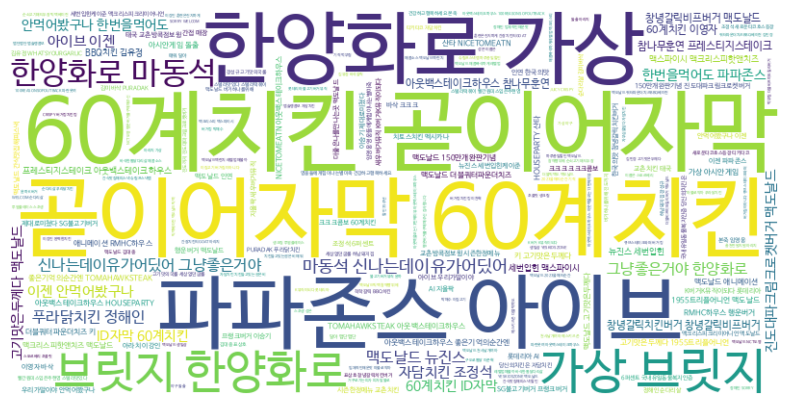

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 광고 문구 텍스트 합치기
text = " ".join(advert_texts)

# 워드클라우드 생성
# Update the font path to a known working font if NanumGothic is not installed
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      width=800, height=400, background_color="white").generate(text)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NLP 끝. 이거는 쓰기 힘드니까 드랍.

In [ ]:
df.drop(columns=["BRDCST_DE","ADVRTS_BEGIN_TIME", "CHNNEL_NM", "ADVRTS_MATR_NM",
                 "INDUTY_SCLAS_NM", "BRDCST_DE", "AREA_NM", "ANALS_TRGET_NM"], inplace=True)

In [ ]:
df['ADVRTS_TIME'].mean()

17.39394607678818

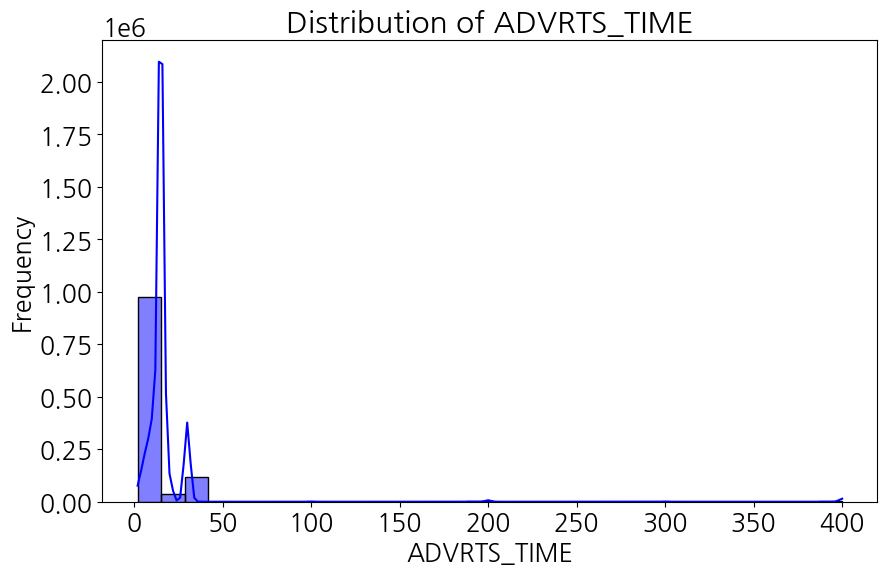

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['ADVRTS_TIME'], bins=30, kde=True, color='blue')
plt.xlabel("ADVRTS_TIME")
plt.ylabel("Frequency")
plt.title("Distribution of ADVRTS_TIME")
plt.show()


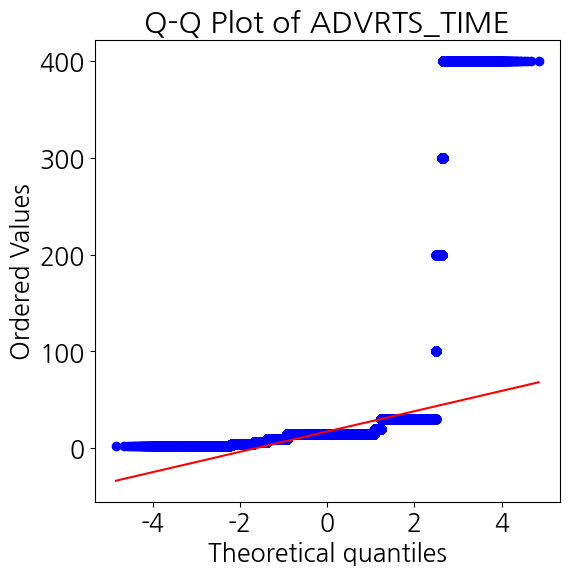

In [ ]:
import scipy.stats as stats

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(df['ADVRTS_TIME'], dist="norm", plot=plt)
plt.title("Q-Q Plot of ADVRTS_TIME")
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

skewness = skew(df['ADVRTS_TIME'])
kurt = kurtosis(df['ADVRTS_TIME'])

print(f"Skewness (왜도): {skewness:.4f}")
print(f"Kurtosis (첨도): {kurt:.4f}")


Skewness (왜도): 12.8047
Kurtosis (첨도): 175.5359


In [ ]:
#광고시간 15초 전, 후로 15초 미만은 0, 15초 이상은 1
df['ADVRTS_TIME'] = df['ADVRTS_TIME'].apply(lambda x: 1 if x >= 15 else 0)

In [ ]:
df = pd.get_dummies(df, columns=["요일"], prefix='요일')

In [ ]:
df.head()

,ADVRTS_TIME,UNIT_ACCTO_ADVRTS_ODR,UNIT_ACCTO_ADVRTS_CO,TVGRP_CO,frequency,TYPE_자막,TYPE_토막,TYPE_프로,CLASS_A,CLASS_B,CLASS_C,CLASS_SA,AD_POS_그외,AD_POS_전,AD_POS_중간,AD_POS_후,요일_Saturday,요일_Sunday,요일_Weekday
0,1,3,3,1,0,False,False,True,True,False,False,False,False,False,False,True,0.0,1.0,0.0
1,1,3,3,0,0,False,False,True,True,False,False,False,False,False,False,True,0.0,1.0,0.0
2,1,3,3,1,0,False,False,True,True,False,False,False,False,False,False,True,0.0,1.0,0.0
3,1,3,3,0,0,False,False,True,True,False,False,False,False,False,False,True,0.0,1.0,0.0
4,1,3,3,1,0,False,False,True,True,False,False,False,False,False,False,True,0.0,1.0,0.0


In [ ]:
save_path = "/content/drive/MyDrive/dummy.csv"
df.to_csv(save_path, index=False, encoding="utf-8-sig")